In [1]:
%load_ext autoreload
%autoreload 2

from statsmodels.base.model import GenericLikelihoodModel

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import sys

from scipy.interpolate import make_interp_spline, BSpline
from scipy.stats import multivariate_normal

sys.path.append("../")
import vuong_tests_fast

In [2]:
nsims= 500
trials =1000
skip_boot=False
skip_shi=False
refinement_test=True

c1 = .005
c2 = .0025

linspace=40
smoothing =10
adapt_c= False

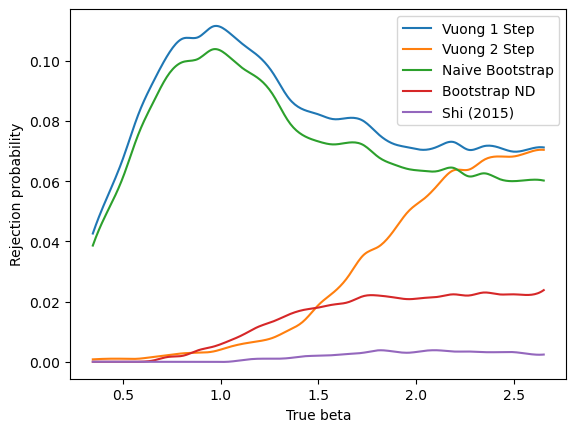

In [3]:
def create_fig(read_name,write_name):
    
    df_results = pd.read_csv("paper_figs/"+read_name[:-4]+".csv") #deal with the fact i messed up the labels...
    wrong_labels = ['Param','Vuong 1 Step','Vuong 1 Step.1', 'Refinement Test', 'Naive Bootstrap','Bootstrap TIC','Bootstrap ND','Shi (2015)']
    right_labels = ['Param','Vuong 1 Step','Vuong 2 Step', 'Refinement Test','Shi (2015)', 'Naive Bootstrap','Bootstrap TIC','Bootstrap ND']
    
    df_results = df_results.rename(columns=dict(zip(wrong_labels, right_labels)))
    params = df_results['Param']
    

    col_labels = ['Vuong 1 Step','Vuong 2 Step', 'Naive Bootstrap','Bootstrap ND','Shi (2015)']

    
    ma2 = lambda x : np.convolve(x,np.ones(smoothing)/smoothing, mode='valid')
    params_new = np.linspace( ma2(params).min(),  ma2(params).max(), 300) 
    interp = lambda x: make_interp_spline(ma2(params), ma2(x), k=3)(params_new)

    for label in col_labels:
        plt.plot(params_new, interp(1-df_results[label]) ,label=label)

    plt.legend()
    plt.xlabel('True beta')
    plt.ylabel('Rejection probability')
    plt.savefig('paper_figs_clean/'+write_name,dpi=300)
    plt.show()
    
    
nobs = 100
read_name = 'no_c_size_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)
write_name = 'clean_size_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)

create_fig(read_name,write_name)

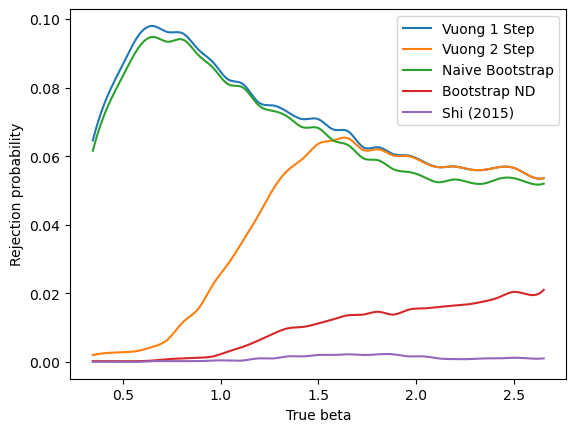

In [4]:
nobs = 250
read_name = 'no_c_size_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)
write_name = 'clean_size_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)

create_fig(read_name,write_name)

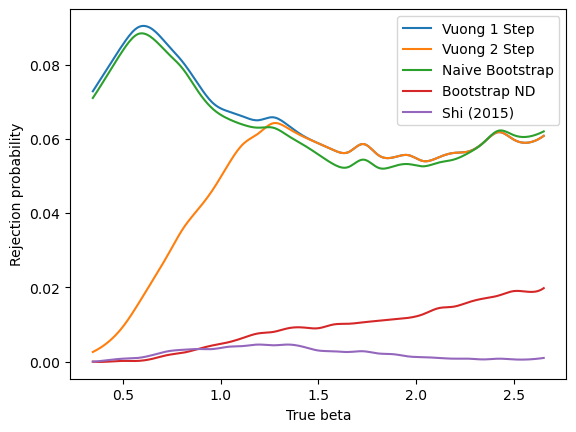

In [5]:
nobs = 500
read_name = 'no_c_size_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)
write_name = 'clean_size_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)

create_fig(read_name,write_name)

# Power stuff

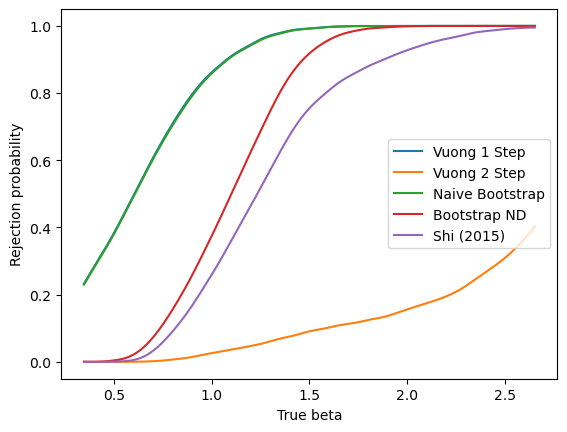

In [6]:
nobs = 100
read_name = 'no_c_power_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)
write_name = 'clean_power_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)

create_fig(read_name,write_name)

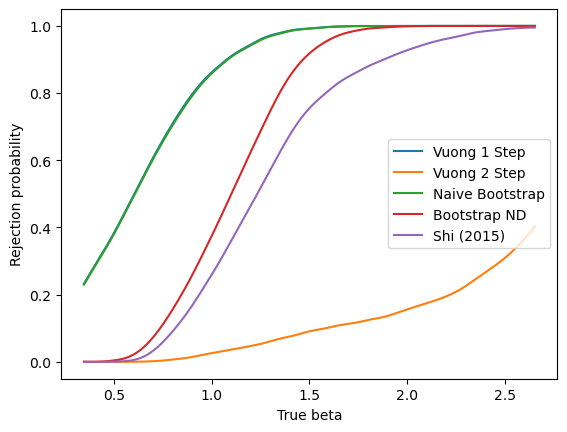

In [7]:
nobs = 250
read_name = 'no_c_power_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)
write_name = 'clean_power_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)

create_fig(read_name,write_name)

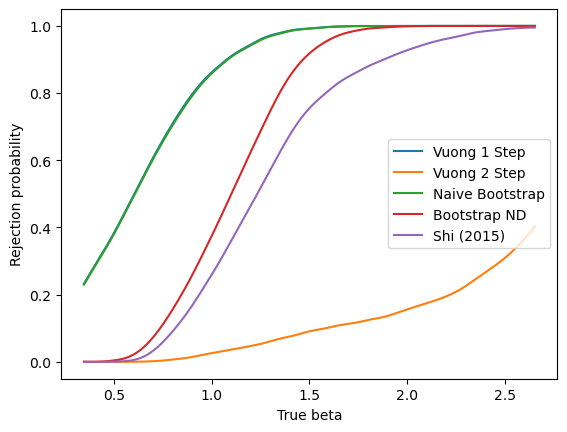

In [8]:
nobs = 500
read_name = 'no_c_power_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)
write_name = 'clean_power_nobs%s_c1%s_c2%s_trials%s.png'%(nobs,c1,c2,trials)

create_fig(read_name,write_name)